# Classification
In this section, we focus on applying machine learning techniques to classify depression levels among students based on data collected from a study measuring depression, anxiety, and stress. After doing the preprocessing of the dataset, we utilized a RandomForest classifier to predict the "Depression" variable.  

The Random Forest model was chosen for its robustness and ability to handle complex interactions between features. By analyzing the model's performance, we aim to identify key factors contributing to depression levels and provide insights into the relationships between depression, anxiety, and stress among students.

## Imports

In [589]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score
import numpy as np

In [590]:
data = pd.read_csv('Preprocessed.csv')

## Encoding and train/test split

Our target is going to be "Depression category", we want to make it a binary value. We took the assumption that if a value is above 0.7 (in a 0 to 1 scale) the student has a high likelyhood to have depression.

In [591]:
data["Depression category"] = data["Depression value"].map(lambda x: 1 if x > 0.7 else 0)

To discretize the anxiety and stress value we do binning. We used the researcher's categories as a reference.

In [592]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]  # max value in the bin
labels = ['No Anxiety', 'Minimal Anxiety', 'Mild Anxiety', 'Moderate Anxiety', 'Severe Anxiety'] # bin labels
data['Anxiety category'] = pd.cut(data['Anxiety value'], bins=bins, labels=labels)

In [593]:
bins = [0, 0.25, 0.5, 0.75, 1]  # max value in the bin
labels = ['No Stress', 'Low Stress', 'Mild Stress', 'High Perceived Stress'] # bin labels
data['Stress category'] = pd.cut(data['Stress value'], bins=bins, labels=labels)

In [594]:
le = LabelEncoder()

for column in ["Age", "Gender", "Current CGPA", "Anxiety category", "Stress category"]:
    data[column] = le.fit_transform(data[column])

data = data.drop(columns=["University", "Department"])

In [595]:
data.head()

,Age,Gender,Year,Current CGPA,Stress value,Anxiety value,Depression value,Depression category,Anxiety category,Stress category
0,0,0,2,0,0.760870,0.716667,0.712121,1,2,0
1,0,1,3,1,0.684783,0.550000,0.712121,1,0,2
2,0,1,3,1,0.010870,0.000000,0.000000,0,5,3
3,0,1,3,1,0.489130,0.483333,0.478788,0,0,1
4,0,1,2,0,0.804348,0.633333,0.769697,1,2,0


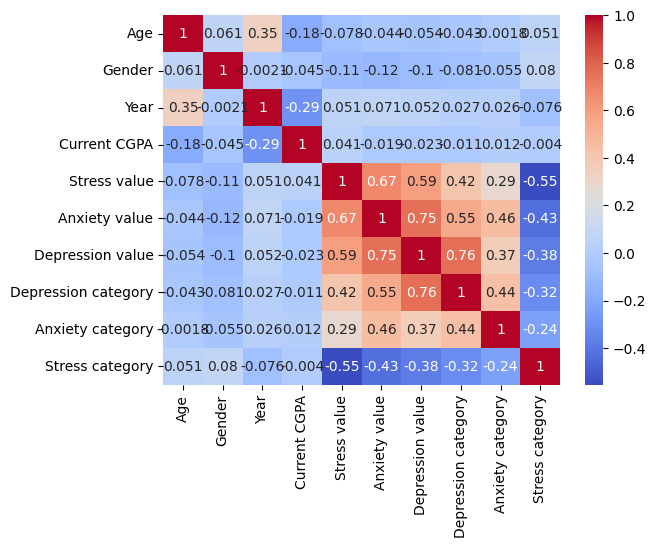

In [596]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Now we divide our dataset into `X` (all the attributes that aren't "Depression value" which is the target attribute) and `y` which contains only the values for "Depression value". We split 70% for testing and 30% for test.

In [597]:
X = data.drop(columns=["Depression value", "Anxiety value", "Stress value", "Depression category"]) 
y = data["Depression category"]
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      Age  Gender  Year  Current CGPA  Anxiety category  Stress category
0       0       0     2             0                 2                0
1       0       1     3             1                 0                2
2       0       1     3             1                 5                3
3       0       1     3             1                 0                1
4       0       1     2             0                 2                0
...   ...     ...   ...           ...               ...              ...
2023    0       1     2             1                 4                0
2024    0       0     3             1                 4                0
2025    0       1     2             0                 2                2
2026    1       0     3             2                 4                0
2027    0       1     2             0                 2                2

[2028 rows x 6 columns]
0       1
1       1
2       0
3       0
4       1
       ..
2023    0
2024    1
2025    0
2026    1

## RandomForestClassifier

In [598]:
rf = RandomForestClassifier(max_depth=10, max_features='log2', criterion='gini', n_estimators=50)
rf = rf.fit(X_train, y_train)

In [599]:
y_test_pred = rf.predict(X_test)

In [600]:
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       293
           1       0.65      0.50      0.56       113

    accuracy                           0.79       406
   macro avg       0.74      0.70      0.71       406
weighted avg       0.77      0.79      0.78       406

Test Accuracy: 0.7857142857142857


In [601]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
 [[263  30]
 [ 57  56]]


[Text(0.3669945987654321, 0.9545454545454546, 'x[3] <= 0.5\ngini = 0.38\nsamples = 1037\nvalue = [1208.0, 414.0]'),
 Text(0.11702674897119342, 0.8636363636363636, 'x[0] <= 0.5\ngini = 0.426\nsamples = 197\nvalue = [216, 96]'),
 Text(0.24201067386831276, 0.9090909090909092, 'True  '),
 Text(0.06430041152263374, 0.7727272727272727, 'x[1] <= 0.5\ngini = 0.349\nsamples = 103\nvalue = [124, 36]'),
 Text(0.030864197530864196, 0.6818181818181818, 'x[2] <= 1.5\ngini = 0.245\nsamples = 28\nvalue = [36, 6]'),
 Text(0.012345679012345678, 0.5909090909090909, 'x[4] <= 1.5\ngini = 0.287\nsamples = 14\nvalue = [19, 4]'),
 Text(0.00823045267489712, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [9, 0]'),
 Text(0.01646090534979424, 0.5, 'x[5] <= 1.5\ngini = 0.408\nsamples = 8\nvalue = [10, 4]'),
 Text(0.00823045267489712, 0.4090909090909091, 'x[5] <= 0.5\ngini = 0.48\nsamples = 3\nvalue = [2, 3]'),
 Text(0.00411522633744856, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.01234567901234

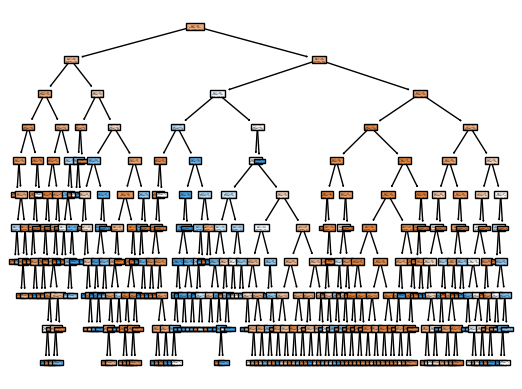

In [602]:
tree.plot_tree(rf.estimators_[0], filled=True)

### Overfitting

We realized that our model might be overfitting because of the high tree depth when we didn't specify it in the parameter `max_depth`.

Text(0, 0.5, 'Accuracy')

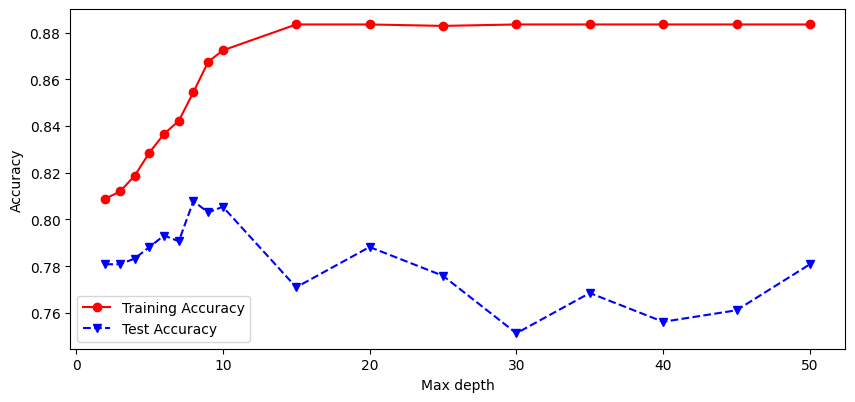

In [603]:
max_depths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

train_acc = np.zeros(len(max_depths))
test_acc = np.zeros(len(max_depths))
ccp_alphas = np.zeros(len(max_depths))
impurities = np.zeros(len(max_depths))

prun_path = dict()

index = 0

for depth_test in max_depths:
    rf = RandomForestClassifier(criterion='entropy', max_depth=depth_test)

    rf = rf.fit(X_train, y_train)
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)
    train_acc[index] = accuracy_score(y_train, y_pred_train)
    test_acc[index] = accuracy_score(y_test, y_pred_test)
    index += 1

plt.figure(figsize=(10,15))    
ax = plt.subplot(3, 1, 1)
ax.plot(max_depths,train_acc,'ro-',max_depths,test_acc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

The training accuracy increases as the max_depth increases. On the other hand, the test accuracy decreases, this means the model is memorizing the training data and it fails to generalize well to unseen data.

To try and fix this issue we do Prunning.

In [604]:
pruned_trees = []
for tree in rf.estimators_:
    path = tree.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas  # Effective alphas
    impurities = path.impurities
    optimal_alpha = ccp_alphas[np.argmin(impurities)]

    pruned_tree = RandomForestClassifier(ccp_alpha=optimal_alpha)
    pruned_tree.fit(X_train, y_train)
    pruned_trees.append(pruned_tree)

y_pred = [tree.predict(X_test) for tree in pruned_trees]
final_predictions = np.array(y_pred).T
majority_votes = [np.bincount(preds).argmax() for preds in final_predictions]
print("Pruned Random Forest Accuracy:", accuracy_score(y_test, majority_votes))

Pruned Random Forest Accuracy: 0.7881773399014779


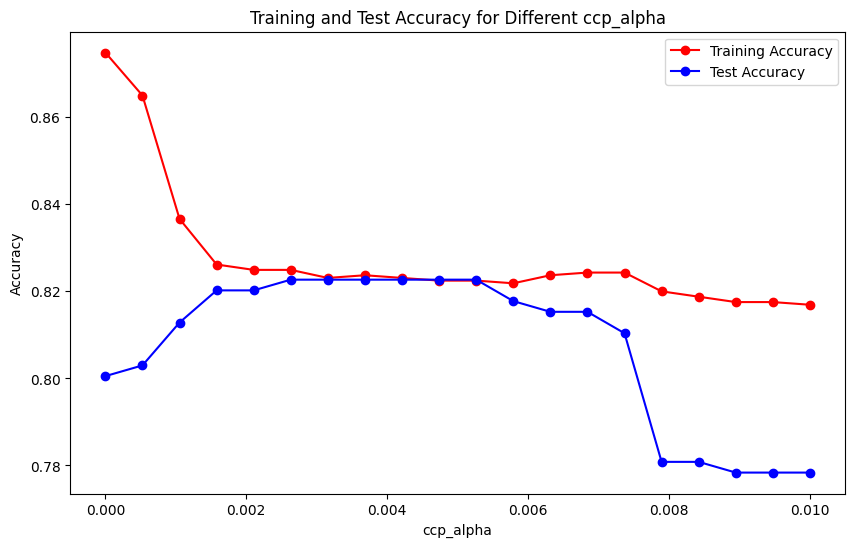

Optimal ccp_alpha: 0.002631578947368421
Best Test Accuracy: 0.8227


In [605]:
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]
train_acc = np.zeros(len(max_depths))
test_acc = np.zeros(len(max_depths))

# Find optimal ccp_alpha
ccp_alphas = np.linspace(0.0, 0.01, 20)
train_accuracies = []
test_accuracies = []

for ccp_alpha in ccp_alphas:
    rf = RandomForestClassifier(ccp_alpha=ccp_alpha, random_state=42, max_depth=10, max_features='log2', criterion='gini', n_estimators=50)
    rf.fit(X_train, y_train)
    
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_accuracies, marker='o', label='Training Accuracy', color='red')
plt.plot(ccp_alphas, test_accuracies, marker='o', label='Test Accuracy', color='blue')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy for Different ccp_alpha')
plt.legend()
plt.show()

optimal_index = np.argmax(test_accuracies)
optimal_ccp_alpha = ccp_alphas[optimal_index]

print(f"Optimal ccp_alpha: {optimal_ccp_alpha}")
print(f"Best Test Accuracy: {test_accuracies[optimal_index]:.4f}")

Text(0, 0.5, 'Accuracy')

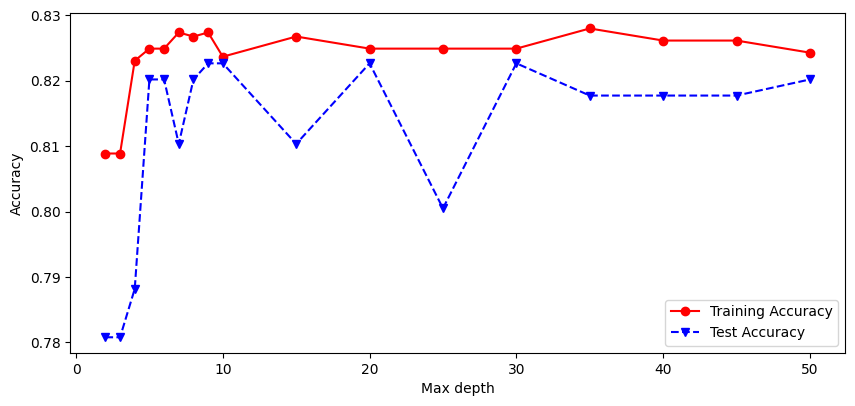

In [606]:
max_depths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

train_acc = np.zeros(len(max_depths))
test_acc = np.zeros(len(max_depths))
prun_path = dict()

index = 0
for depth_test in max_depths:
    rf = RandomForestClassifier(criterion='gini', max_depth=depth_test, ccp_alpha=optimal_ccp_alpha)

    rf = rf.fit(X_train, y_train)
    Y_predTrain = rf.predict(X_train)
    Y_predTest = rf.predict(X_test)
    train_acc[index] = accuracy_score(y_train, Y_predTrain)
    test_acc[index] = accuracy_score(y_test, Y_predTest)
    index += 1

plt.figure(figsize=(10,15))    
ax = plt.subplot(3, 1, 1)
ax.plot(max_depths,train_acc,'ro-',max_depths,test_acc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')


The following two factors shows that the Prunning worked.

- Training accuracy plateaus at around 0.83 even when max_depth is increasig.
- Test accuracy is consistent and has minimal deviation from the training accuracy.


Training Accuracy (Pruned): 0.8243
Test Accuracy (Pruned): 0.8128


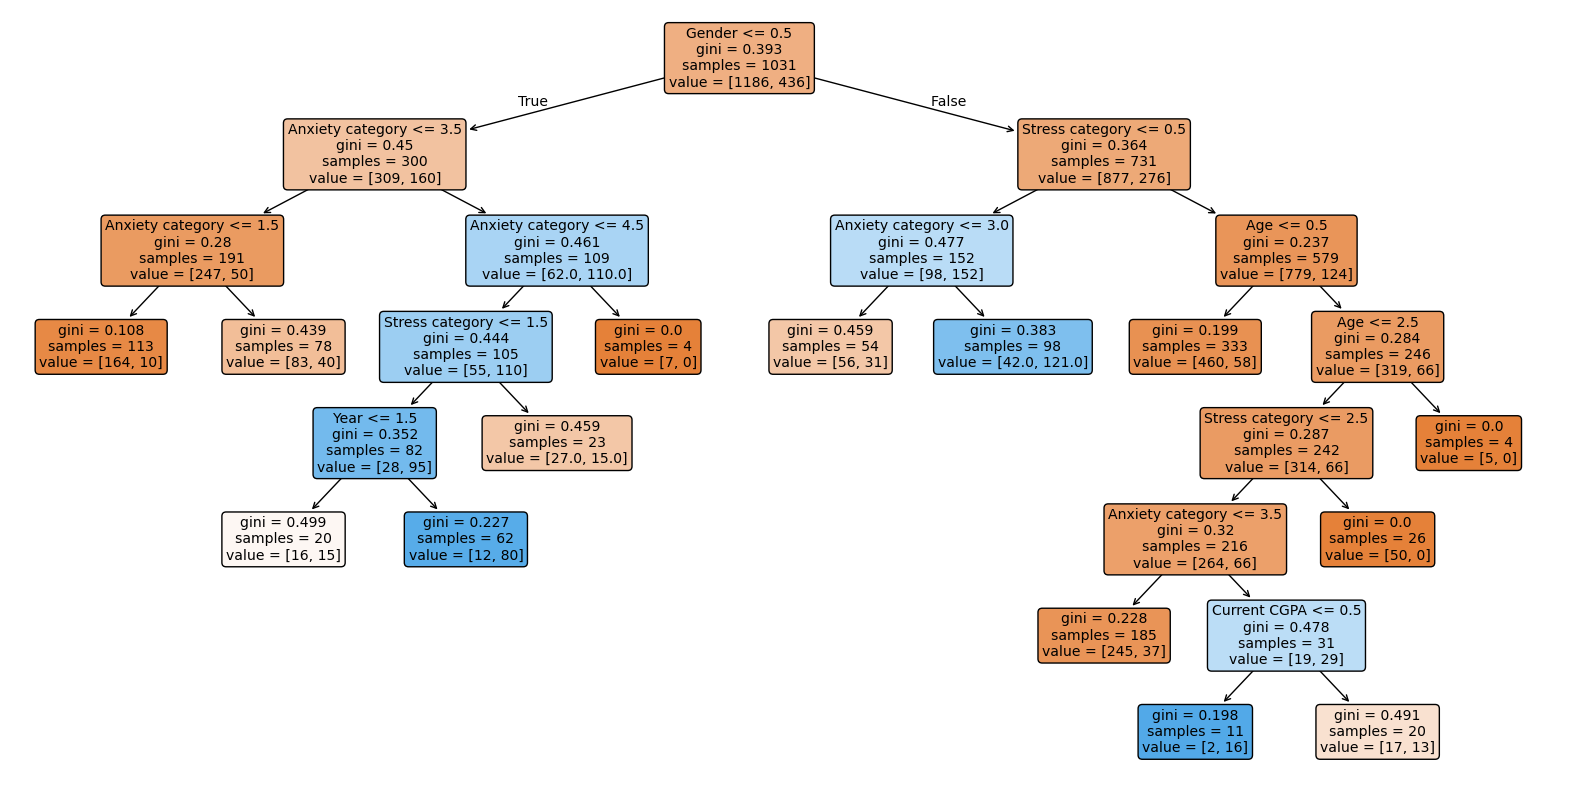

In [607]:
# Train RandomForest with the optimal ccp_alpha
rf_pruned = RandomForestClassifier(criterion='gini', ccp_alpha=optimal_ccp_alpha, random_state=42, max_features='log2', n_estimators=50)
rf_pruned.fit(X_train, y_train)

y_train_pred = rf_pruned.predict(X_train)
y_test_pred = rf_pruned.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy (Pruned): {train_accuracy:.4f}")
print(f"Test Accuracy (Pruned): {test_accuracy:.4f}")

plt.figure(figsize=(20, 10))
plot_tree(rf_pruned.estimators_[0], feature_names=list(X_train.columns), filled=True, rounded=True)
plt.show()

## Conclusion

In this classification project, we applied a RandomForest classifier to predict the likelihood of depression among students based on various features, such as anxiety, stress, and demographic factors. Through this process, we achieved the following key insights:

1. **Overfitting Analysis**  
   - Initial results indicated overfitting due to excessive tree depth in the RandomForest.  
   - Incorporating pruning techniques improved the model's generalizability.  
   - The pruned model demonstrated consistent test accuracy with minimal deviation from training accuracy, indicating successful mitigation of overfitting.

2. **Model Performance**  
   - The final pruned RandomForest model achieved robust accuracy for both training and test datasets.  

This study highlights the utility of RandomForest in handling complex datasets and emphasizes the importance of data preprocessing and normalization, hyperparameter tuning and overfitting prevention for reliable predictive modeling.
